In [133]:
import logging
logging.basicConfig(level=logging.WARN)

from copy import copy

import gym
import gym_corridor

from lcs.agents import EnvironmentAdapter
from lcs.metrics import population_metrics
from lcs.agents.acs2 import ACS2
from lcs.strategies.action_selection import BestAction, EpsilonGreedy, KnowledgeArray, ActionDelay

from utils.corridorx import calculate_knowledge
from utils.experiments import avg_experiments
from utils.plotting import COLORS

from matplotlib import rc
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

rc('pdf', **{'fonttype': 42})
rc('ps', **{'fonttype': 42})
rc('font',**{'family':'sans-serif', 'sans-serif': ['DejaVu Sans'],'size': 14})

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # comment if you don't have high-res display

## Experiment settings

In [2]:
experiments = 50

explore_trials = 60
exploit_trials = 20

## Environment

In [3]:
corridor_length = 20  # 20/40/100

ENV_NAME = f'corridor-{corridor_length}-v0'
env = gym.make(ENV_NAME)

In [4]:
def corridor_metrics(pop, env):
    metrics = {
        'knowledge': calculate_knowledge(pop, env)
    }
    metrics.update(population_metrics(pop, env))
    return metrics



class CorridorAdapter(EnvironmentAdapter):
    @staticmethod
    def to_genotype(phenotype):
        return phenotype,

In [5]:
base_params = {
    "classifier_length": 1,
    "number_of_possible_actions": 2,
    "epsilon": 0.8,
    "beta": 0.2,
    "gamma": 0.95,
    "initial_q": 0.5,
    "theta_exp": 50,
    "theta_ga": 50,
    "do_ga": True,
    "mu": 0.03,
    "u_max": 1,
    "metrics_trial_frequency": 1,
    "environment_adapter": CorridorAdapter,
    "user_metrics_collector_fcn": corridor_metrics
}

### Epsilon Greedy (baseline)

In [6]:
%%time

epsilon_greedy_params = copy(base_params)
epsilon_greedy_params['action_selector'] = EpsilonGreedy
epsilon_greedy_df = avg_experiments(experiments, env, explore_trials, exploit_trials, **epsilon_greedy_params)

{'classifier_length': 1, 'number_of_possible_actions': 2, 'epsilon': 0.8, 'beta': 0.2, 'gamma': 0.95, 'initial_q': 0.5, 'theta_exp': 50, 'theta_ga': 50, 'do_ga': True, 'mu': 0.03, 'u_max': 1, 'metrics_trial_frequency': 1, 'environment_adapter': <class '__main__.CorridorAdapter'>, 'user_metrics_collector_fcn': <function corridor_metrics at 0x1159b8830>, 'action_selector': <class 'lcs.strategies.action_selection.EpsilonGreedy.EpsilonGreedy'>}

Executing experiment 0
Executing experiment 1
Executing experiment 2
Executing experiment 3
Executing experiment 4
Executing experiment 5
Executing experiment 6
Executing experiment 7
Executing experiment 8
Executing experiment 9
Executing experiment 10
Executing experiment 11
Executing experiment 12
Executing experiment 13
Executing experiment 14
Executing experiment 15
Executing experiment 16
Executing experiment 17
Executing experiment 18
Executing experiment 19
Executing experiment 20
Executing experiment 21
Executing experiment 22
Executing ex

### Action Delay Bias

In [7]:
%%time

action_delay_params = copy(base_params)
action_delay_params['biased_exploration_prob'] = 0.5
action_delay_params['action_selector'] = ActionDelay

action_delay_df = avg_experiments(experiments, env, explore_trials, exploit_trials, **action_delay_params)

{'classifier_length': 1, 'number_of_possible_actions': 2, 'epsilon': 0.8, 'beta': 0.2, 'gamma': 0.95, 'initial_q': 0.5, 'theta_exp': 50, 'theta_ga': 50, 'do_ga': True, 'mu': 0.03, 'u_max': 1, 'metrics_trial_frequency': 1, 'environment_adapter': <class '__main__.CorridorAdapter'>, 'user_metrics_collector_fcn': <function corridor_metrics at 0x1159b8830>, 'biased_exploration_prob': 0.5, 'action_selector': <class 'lcs.strategies.action_selection.ActionDelay.ActionDelay'>}

Executing experiment 0
Executing experiment 1
Executing experiment 2
Executing experiment 3
Executing experiment 4
Executing experiment 5
Executing experiment 6
Executing experiment 7
Executing experiment 8
Executing experiment 9
Executing experiment 10
Executing experiment 11
Executing experiment 12
Executing experiment 13
Executing experiment 14
Executing experiment 15
Executing experiment 16
Executing experiment 17
Executing experiment 18
Executing experiment 19
Executing experiment 20
Executing experiment 21
Executin

### Knowledge Array Bias

In [8]:
%%time

knowledge_array_params = copy(base_params)
knowledge_array_params['biased_exploration_prob'] = 0.5
knowledge_array_params['action_selector'] = KnowledgeArray

knowledge_array_df = avg_experiments(experiments, env, explore_trials, exploit_trials, **knowledge_array_params)

{'classifier_length': 1, 'number_of_possible_actions': 2, 'epsilon': 0.8, 'beta': 0.2, 'gamma': 0.95, 'initial_q': 0.5, 'theta_exp': 50, 'theta_ga': 50, 'do_ga': True, 'mu': 0.03, 'u_max': 1, 'metrics_trial_frequency': 1, 'environment_adapter': <class '__main__.CorridorAdapter'>, 'user_metrics_collector_fcn': <function corridor_metrics at 0x1159b8830>, 'biased_exploration_prob': 0.5, 'action_selector': <class 'lcs.strategies.action_selection.KnowledgeArray.KnowledgeArray'>}

Executing experiment 0
Executing experiment 1
Executing experiment 2
Executing experiment 3
Executing experiment 4
Executing experiment 5
Executing experiment 6
Executing experiment 7
Executing experiment 8
Executing experiment 9
Executing experiment 10
Executing experiment 11
Executing experiment 12
Executing experiment 13
Executing experiment 14
Executing experiment 15
Executing experiment 16
Executing experiment 17
Executing experiment 18
Executing experiment 19
Executing experiment 20
Executing experiment 21
Ex

### Optimistic Initial Quality

In [9]:
%%time

op_initial_params = copy(base_params)
op_initial_params['action_selector'] = EpsilonGreedy
op_initial_params['initial_q'] = 0.8

op_initial_df = avg_experiments(experiments, env, explore_trials, exploit_trials, **op_initial_params)

{'classifier_length': 1, 'number_of_possible_actions': 2, 'epsilon': 0.8, 'beta': 0.2, 'gamma': 0.95, 'initial_q': 0.8, 'theta_exp': 50, 'theta_ga': 50, 'do_ga': True, 'mu': 0.03, 'u_max': 1, 'metrics_trial_frequency': 1, 'environment_adapter': <class '__main__.CorridorAdapter'>, 'user_metrics_collector_fcn': <function corridor_metrics at 0x1159b8830>, 'action_selector': <class 'lcs.strategies.action_selection.EpsilonGreedy.EpsilonGreedy'>}

Executing experiment 0
Executing experiment 1
Executing experiment 2
Executing experiment 3
Executing experiment 4
Executing experiment 5
Executing experiment 6
Executing experiment 7
Executing experiment 8
Executing experiment 9
Executing experiment 10
Executing experiment 11
Executing experiment 12
Executing experiment 13
Executing experiment 14
Executing experiment 15
Executing experiment 16
Executing experiment 17
Executing experiment 18
Executing experiment 19
Executing experiment 20
Executing experiment 21
Executing experiment 22
Executing ex

## Visualization

## Aggregated performance plot

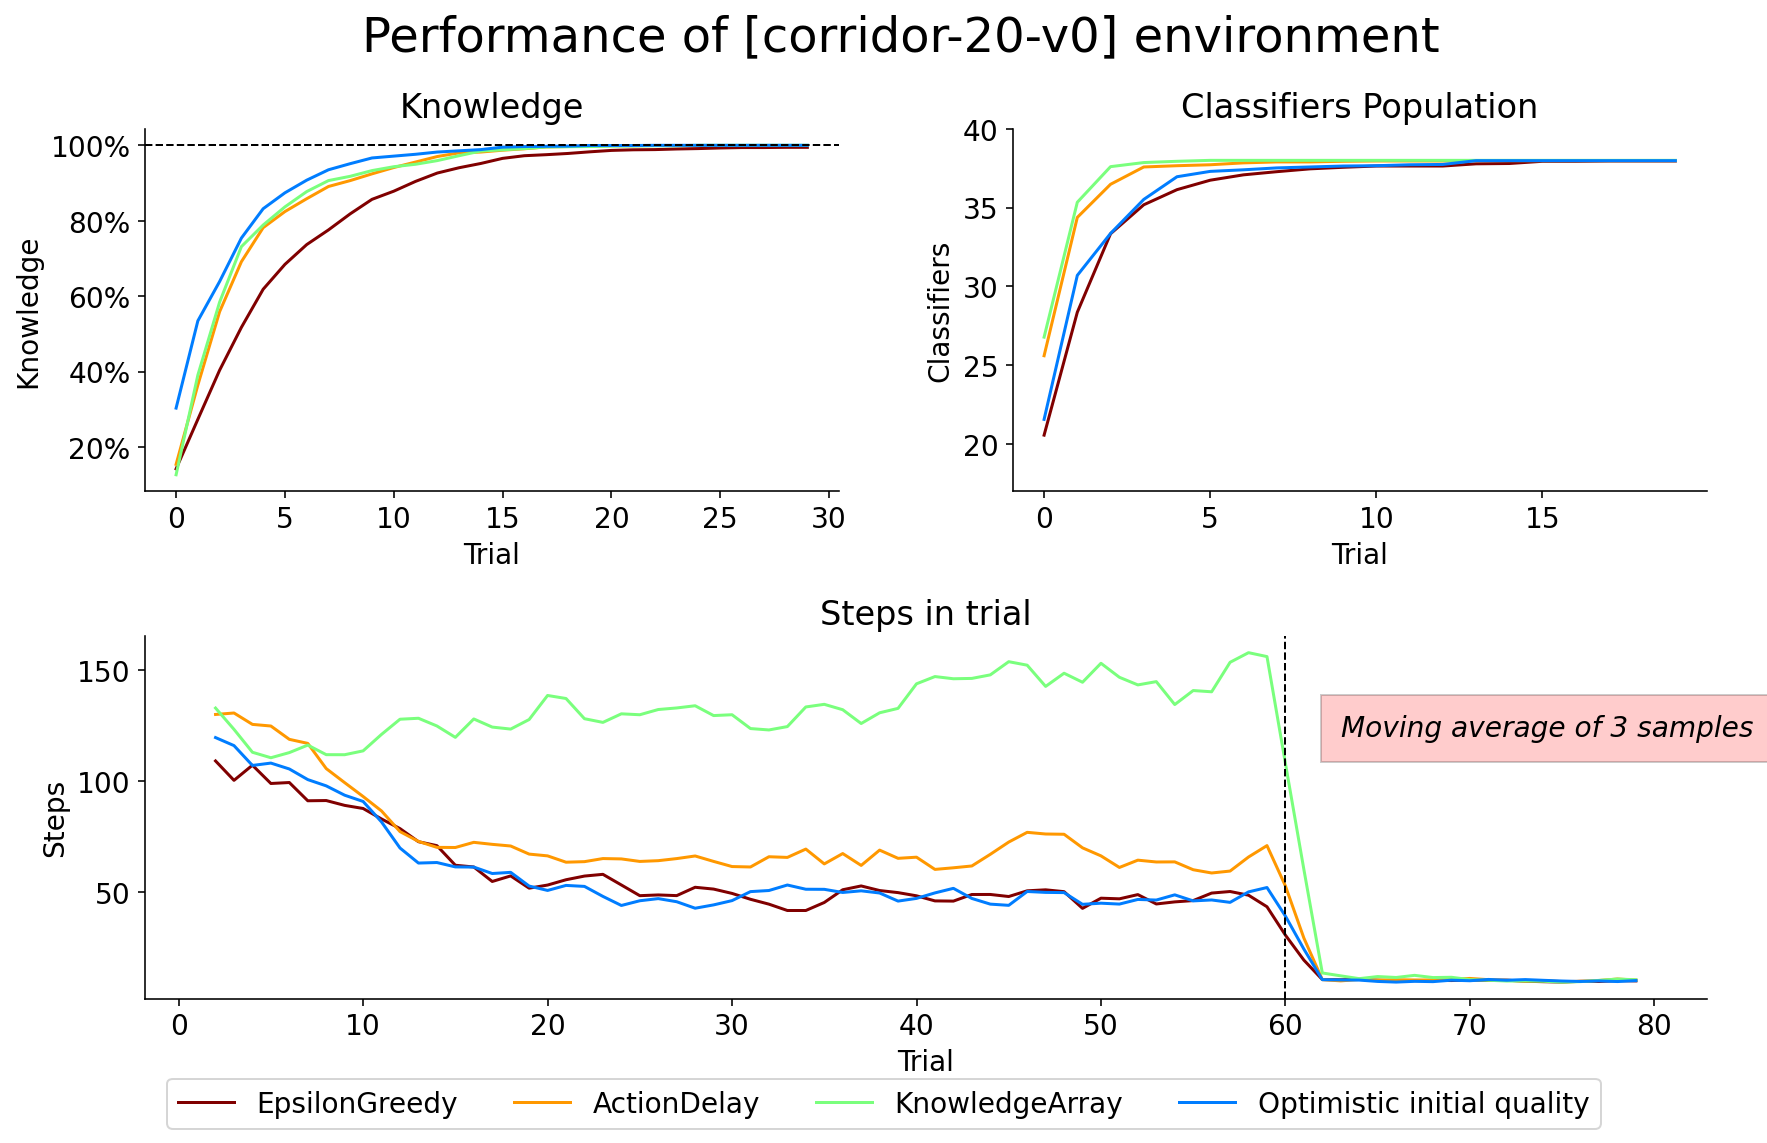

In [140]:
fig = plt.figure(figsize=(14, 8))

# Layout
gs = fig.add_gridspec(2,2, wspace=.25, hspace=.4)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Global title
fig.suptitle(f'Performance of [{env.unwrapped.spec.id}] environment', fontsize=24)

# Each axis

# Knowledge
ax1_first = 30  # numer of first trials to show on plot

epsilon_greedy_df['knowledge'][:ax1_first].plot(label=epsilon_greedy_params['action_selector'].__name__, c=COLORS['eg'], ax=ax1)
action_delay_df['knowledge'][:ax1_first].plot(label=action_delay_params['action_selector'].__name__, c=COLORS['ad'], ax=ax1)
knowledge_array_df['knowledge'][:ax1_first].plot(label=knowledge_array_params['action_selector'].__name__, c=COLORS['ka'], ax=ax1)
op_initial_df['knowledge'][:ax1_first].plot(label='Optimistic initial quality', c=COLORS['oiq'], ax=ax1)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title('Knowledge');
ax1.set_xlabel('Trial')
ax1.set_ylabel('Knowledge')
ax1.axhline(y=100, color='black', linewidth=1, linestyle="--")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())


# Population
ax2_first = 20

epsilon_greedy_df['population'][:ax2_first].plot(label=epsilon_greedy_params['action_selector'].__name__, c=COLORS['eg'], ax=ax2)
action_delay_df['population'][:ax2_first].plot(label=action_delay_params['action_selector'].__name__, c=COLORS['ad'], ax=ax2)
knowledge_array_df['population'][:ax2_first].plot(label=knowledge_array_params['action_selector'].__name__, c=COLORS['ka'], ax=ax2)
op_initial_df['population'][:ax2_first].plot(label='Optimistic initial quality', c=COLORS['oiq'], ax=ax2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel('Trial')
ax2.set_ylabel('Classifiers')
ax2.set_title('Classifiers Population');
ax2.set_ylim(17, 40)
ax2.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

# Steps in trial
window = 3 # window for moving average
epsilon_greedy_df['steps_in_trial'].rolling(window=window).mean().plot(label=epsilon_greedy_params['action_selector'].__name__, c=COLORS['eg'], ax=ax3)
action_delay_df['steps_in_trial'].rolling(window=window).mean().plot(label=action_delay_params['action_selector'].__name__, c=COLORS['ad'], ax=ax3)
knowledge_array_df['steps_in_trial'].rolling(window=window).mean().plot(label=knowledge_array_params['action_selector'].__name__, c=COLORS['ka'], ax=ax3)
op_initial_df['steps_in_trial'].rolling(window=window).mean().plot(label='Optimistic initial quality', c=COLORS['oiq'], ax=ax3)


ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xlabel('Trial')
ax3.set_ylabel('Steps')
ax3.set_title('Steps in trial')
ax3.axvline(x=explore_trials, color='black', linewidth=1, linestyle="--")
ax3.text(63, 120, f'Moving average of {window} samples', style='italic', bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})

# Create legend
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4);

# Save plot to file
fig.savefig('corridor-performance.pdf')